**
# Telecommunications Customer Churn Prediction Analysis**

# Business Understanding

## 1. Introduction
This project aims to assist a telecom company in understanding their data and predicting customer churn. The company has provided access to three different datasets: the first dataset with 3000 records stored in a remote Microsoft SQL Server database, the second dataset with 2000 records stored on OneDrive, and the third dataset hosted on a GitHub repository.

### 1.1. Objectives
Understand the data: Our first objective is to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, we aim to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The primary objective is to develop a predictive model that accurately determines whether a customer is likely to churn or not. We will employ machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to build a model that effectively predicts customer churn.

### 1.2. Methodology
To achieve our objectives, we will follow the CRISP-DM framework, which consists of the following steps:

Data exploration: We will thoroughly explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide us with an initial understanding of the data and help identify any data quality issues.

Missing value computations: We will identify missing values in the datasets and decide on an appropriate strategy for handling them. This may involve imputing missing values or removing data points with missing values.

Feature engineering: We will perform feature engineering to transform and create new variables that can potentially improve the predictive power of our models. This step may include encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: We will utilize various machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. We will train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: We will evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, we will interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: We will fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

By following this methodology, we aim to provide valuable insights to the telecom company and develop a reliable predictive model for customer churn.

## Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their 
demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Setup

## Installations

In [110]:
%pip install pyodbc
%pip install openpyxl
%pip install imblearn
%pip install xgboost
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importation

In [178]:
# Data Handling
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import math

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import randint

# Feature Processing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



# Machine Learning Models
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

# Other Packages
import random
import pickle
import warnings

warnings.filterwarnings("ignore")

## Data Loading

### Load first dataset from SQL database

In [112]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [113]:
connection = pyodbc.connect(connection_string)

In [114]:
# Query the database to retrieve the data
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [115]:
# Display the dataframe
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Load second dataset (excelfile)

In [116]:
# Read the csv file into a pandas dataframe
data2 = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Github projects/Customer-churn-Analysis-1/datasets/LP2_Telco-churn-second-2000.csv')

# Display the dataframe
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Load third dataset (csv file)

In [117]:
# Read third dataset
data3 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Github projects\Customer-churn-Analysis-1\datasets\Telco-churn-last-2000 .csv')

# Display the dataframe
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Load test data

In [118]:
# Read the csv file into a pandas dataframe
test_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Github projects\Customer-churn-Analysis-1\datasets\Telco-churn-last-2000 .csv')

# Display the dataframe
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Train dataset

In [119]:
# Concatenate dataset 1 and 2 to form the train dataset
train_data = pd.concat([data,data2], ignore_index=True)
train_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


## Exploratory Data Analysis

In [120]:
# Get shape of the datasets
train_data.shape, test_data.shape

((5043, 21), (2000, 20))

In [121]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [122]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [123]:
# Function to change headers to lowercase
def data_columns_lower(data):
    data.columns = data.columns.str.lower()
    return data

In [124]:
# Change train columns to lowercase
data_columns_lower(train_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [125]:
# Change test data columns to lowercase
data_columns_lower(test_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [126]:
# check for missing values
train_data.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [127]:
# Check for duplicates
train_data.duplicated().sum()

np.int64(0)

In [128]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   seniorcitizen     2000 non-null   int64  
 3   partner           2000 non-null   object 
 4   dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   phoneservice      2000 non-null   object 
 7   multiplelines     2000 non-null   object 
 8   internetservice   2000 non-null   object 
 9   onlinesecurity    2000 non-null   object 
 10  onlinebackup      2000 non-null   object 
 11  deviceprotection  2000 non-null   object 
 12  techsupport       2000 non-null   object 
 13  streamingtv       2000 non-null   object 
 14  streamingmovies   2000 non-null   object 
 15  contract          2000 non-null   object 
 16  paperlessbilling  2000 non-null   object 


In [129]:
# Check for test missing values
test_data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

### observations from the datasets

The train dataset has 5043 rows (entries), while the test dataset has 2000 rows. Several columns in both datasets contain missing values. 

The 'SeniorCitizens' column in the test dataset is an object while in the train dataset it is an integer.

The 'TotalCharges' column in each dataset represents the total charges for each customer which represents a numeric data type but it is presented as one with object (string) values.

As expected, the test dataset does not have the "Churn" column. This column is not needed because 'Churn' is the variable we want to predict. The goal is to use the trained model to predict whether customers in the test data will churn or not based on the other available features.

##### Transforming the 'TotalCharges' column into a numeric data type

In [130]:
# Transform the 'TotalCharges' column in the train dataset into a numeric data type
train_data['totalcharges'] = pd.to_numeric(train_data['totalcharges'], errors='coerce')

# Confirm the datatype
train_data['totalcharges'].dtype

dtype('float64')

In [131]:
# Transform the 'TotalCharges' column in the test dataset into a numeric data type
test_data['totalcharges'] = pd.to_numeric(test_data['totalcharges'], errors='coerce')

# Confirm the datatype
test_data['totalcharges'].dtype

dtype('float64')

The 'TotalCharges' column in both the train and test datasets has been transformed into a numeric data type (float64) using the pd.to_numeric() function. 

### The Unique Values of The Columns in Datasets

In [132]:
# Check unique values of each column in the train dataset using a for loop 
# Exclude 'tenure', 'MonthlyCharges' and 'TotalCharges' 
for column in train_data.columns:
    if column not in ['customerid','tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, train_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Female' 'Male']
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [True False 'No' 'Yes']
Column: dependents - Unique Values: [False True 'No' 'Yes']
Column: phoneservice - Unique Values: [False True 'Yes' 'No']
Column: multiplelines - Unique Values: [None False True 'No' 'No phone service' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: onlinebackup - Unique Values: [True False None 'No' 'Yes' 'No internet service']
Column: deviceprotection - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: techsupport - Unique Values: [False True None 'Yes' 'No' 'No internet service']
Column: streamingtv - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: streamingmovies - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: contract - Unique Valu

In [133]:
# Check unique values of each column in the test dataset using a for loop
for column in test_data.columns:
    if column not in ['customerID','tenure', 'MonthlyCharges', 'TotalCharges']:
        print('Column: {} - Unique Values: {}'.format(column, test_data[column].unique()))
        print('==='*5)

Column: customerid - Unique Values: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
Column: gender - Unique Values: ['Male' 'Female']
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: ['No' 'Yes']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['Yes' 'No']
Column: multiplelines - Unique Values: ['Yes' 'No' 'No phone service']
Column: internetservice - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: onlinesecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: onlinebackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: deviceprotection - Unique Values: ['No' 'No internet service' 'Yes']
Column: techsupport - Unique Values: ['No' 'No internet service' 'Yes']
Column: streamingtv - Unique Values: ['Yes' 'No internet service' 'No']
Column: streamingmovies - Unique Values: ['No' 'No internet service' 'Yes']
Column: contract - Unique Values: ['Month-to-month' 'O

There are some differences between the unique values in the train_data and test_data datasets:
i. 'SeniorCitizen' column: The train_data dataset has boolean values (False and True), while the test_data dataset has numeric values (0 and 1).
ii. 'Partner and Dependents' columns: In the train_data dataset, this column contain boolean  (True and False) and string values (Yes and No), while in the test_data dataset, they contain categorical values (Yes and No).

iii. 'PhoneService' column: In the train_data dataset, these columns contain boolean  (True and False) and and string values (Yes and No), while in the test_data dataset, it contains categorical values (Yes and No).

iv. 'MultipleLines' column: In the train_data dataset, this column contains boolean values (False and True) and string values (No, Yes, No phone service), while in the test_data dataset, it contains categorical values (Yes, No, and No phone service).

v. 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'  columns: The training data in these columns contains a mix of boolean (True and False)  and string values (No, Yes, No internet service), while the test data only has the string values (No, Yes, No internet service). 

vi. 'PaperlessBilling' column: The training data has boolean values (True and False) and additional string values ('Yes', 'No') compared to the test data which only has string values ('Yes', 'No').

vii. 'PaymentMethod' column: Some values contain in parenthesis the word 'automatic'. These denominations are too long to be used as tick labels in visualizations.

viii. 'Churn' column: The train_df dataset has boolean values (False and True) and categorical values (None, No, and Yes) in the 'Churn' column. The test_df dataset does not have a 'Churn' column as explained earlier.

#### Fixing the Issues Identified With The Unique Values in The Columns 

In [134]:
# Drop the customer ID column
train_data.drop('customerid', axis=1, inplace=True)
# Drop the customer ID column
test_data.drop('customerid', axis=1, inplace=True)

##### Removing 'automatic' from Payment Method names

In [135]:
# Remove 'automatic' from payment method names in the train dataset
train_data['paymentmethod'] = train_data['paymentmethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
train_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [136]:
# Remove 'automatic' from payment method names in the test dataset
test_data['paymentmethodd'] = test_data['paymentmethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
test_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

##### Modifying Unique Values for Columns In Both Datasets for Consistency

In [137]:
# Modifying The 'SeniorCitizen' column
test_data['seniorcitizen'] = test_data['seniorcitizen'].replace({0: 'No', 1: 'Yes'})

# Modifying selected columns in the train and test datasets using a for loop
columns_to_modify = ['partner', 'seniorcitizen','dependents', 'phoneservice', 'multiplelines',
                          'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                          'streamingtv', 'streamingmovies', 'paperlessbilling']

# Iterate over the columns to replace the unique values using a for loop
for column in columns_to_modify:
    # Replace boolean values with 'No' and 'Yes' in the train dataset
    train_data[column] = train_data[column].replace({False: 'No', True: 'Yes', 'No internet service': 'No','No phone service': 'No'})
    # Replace boolean values with 'No' and 'Yes' in the test dataset
    test_data[column] = test_data[column].replace({False: 'No', True: 'Yes', 'No internet service': 'No','No phone service': 'No'})

# Modifying The 'Churn' column
train_data['churn'] = train_data['churn'].replace({False: 'No', True: 'Yes'})

# convert senior citizen to object
train_data['seniorcitizen'] = train_data['seniorcitizen'].replace({0:'No', 1:'Yes'})

In [138]:
print(train_data.columns)


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


##### Confirming the consistency of the modified unique values for Columns In Both Datasets

In [139]:
# Check unique values of each column
for column in train_data.columns:
    if column not in ['tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, train_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Female' 'Male']
Column: seniorcitizen - Unique Values: ['No' 'Yes']
Column: partner - Unique Values: ['Yes' 'No']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['No' 'Yes']
Column: multiplelines - Unique Values: [None 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: ['No' 'Yes' None]
Column: onlinebackup - Unique Values: ['Yes' 'No' None]
Column: deviceprotection - Unique Values: ['No' 'Yes' None]
Column: techsupport - Unique Values: ['No' 'Yes' None]
Column: streamingtv - Unique Values: ['No' 'Yes' None]
Column: streamingmovies - Unique Values: ['No' 'Yes' None]
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: ['Yes' 'No']
Column: paymentmethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
Column: churn - Unique Values: ['No' 'Yes' None]


In [140]:
# Check unique values of each column
for column in test_data.columns:
    if column not in ['tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, test_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Male' 'Female']
Column: seniorcitizen - Unique Values: ['No' 'Yes']
Column: partner - Unique Values: ['No' 'Yes']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['Yes' 'No']
Column: multiplelines - Unique Values: ['Yes' 'No']
Column: internetservice - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: onlinesecurity - Unique Values: ['No' 'Yes']
Column: onlinebackup - Unique Values: ['No' 'Yes']
Column: deviceprotection - Unique Values: ['No' 'Yes']
Column: techsupport - Unique Values: ['No' 'Yes']
Column: streamingtv - Unique Values: ['Yes' 'No']
Column: streamingmovies - Unique Values: ['No' 'Yes']
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: ['Yes' 'No']
Column: paymentmethod - Unique Values: ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Column: paymentmethodd - Unique Values: ['Electronic check'

# Bivariate Analysis

## 1. Monthly Charges vs. Churn

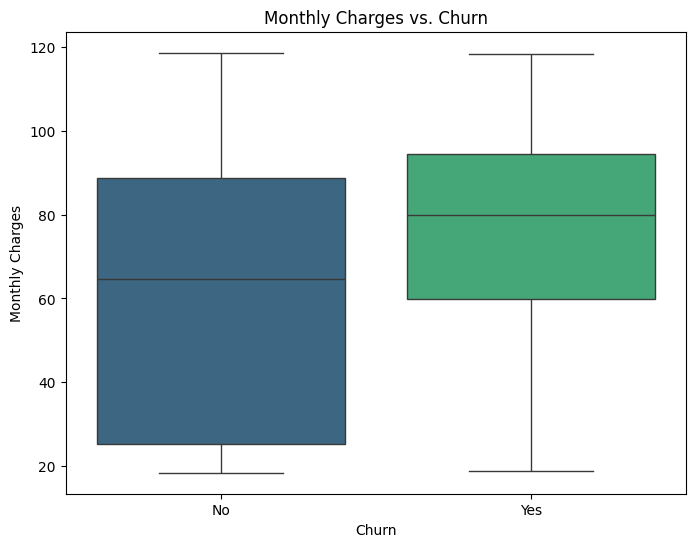

In [141]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='monthlycharges', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

There is a slight difference in monthly charges between churned and non-churned customers. Churned customers tend to have higher monthly charges compared to non-churned customers.

## 2. Churn Distribution by Internet Service Type

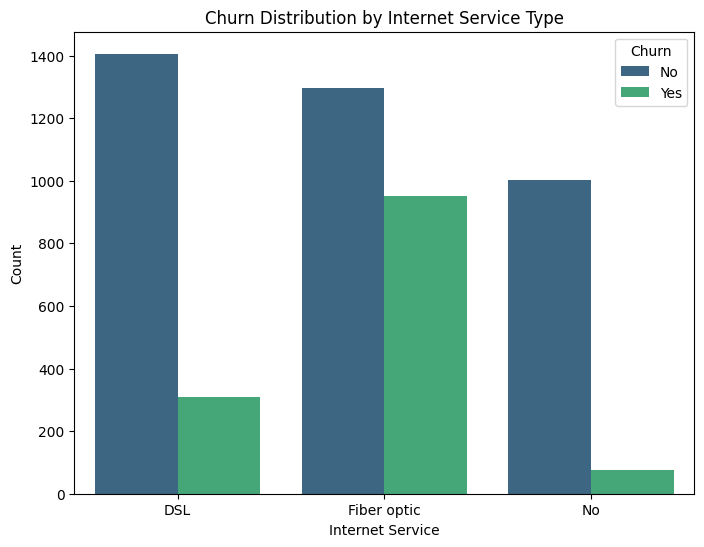

In [142]:
plt.figure(figsize=(8, 6))
sns.countplot(x='internetservice', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

## 3. Churn Distribution by Gender

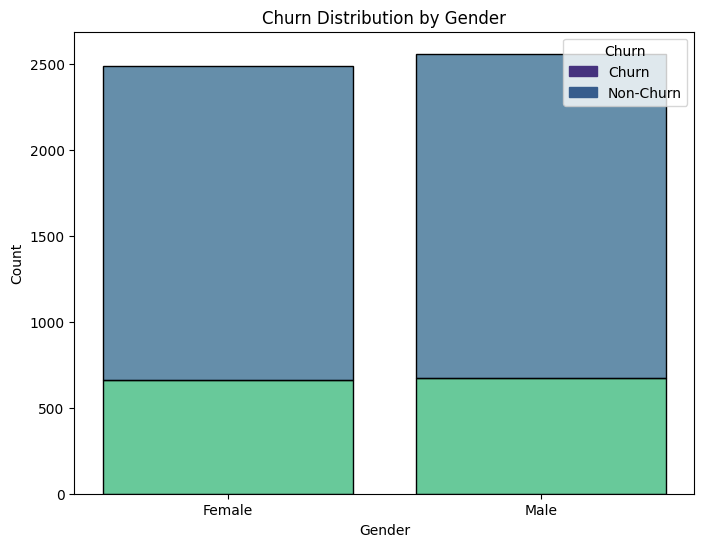

In [143]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='gender', hue='churn', multiple='stack', shrink=0.8, palette='viridis')

# Create custom legend patches
churn_patch = mpatches.Patch(color=sns.color_palette('viridis')[0], label='Churn')
non_churn_patch = mpatches.Patch(color=sns.color_palette('viridis')[1], label='Non-Churn')

# Add legend with custom patches
plt.legend(handles=[churn_patch, non_churn_patch], title='Churn', loc='upper right')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.show()

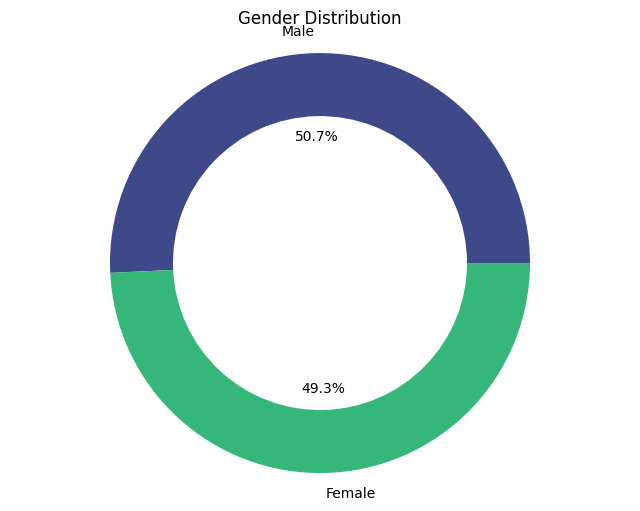

In [144]:
plt.figure(figsize=(8, 6))
sizes = train_data['gender'].value_counts(normalize=True)
colors = ["#3E4989", "#35B779"] 

plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Gender Imbalance: The dataset contains a higher proportion of male customers compared to female customers.

Churn Rate: The churn rate is slightly higher for male customers compared to female customers. This suggests that gender may have a minor influence on customer churn, but it is not a strong determining factor.

## 4. Churn Distribution by Tenure

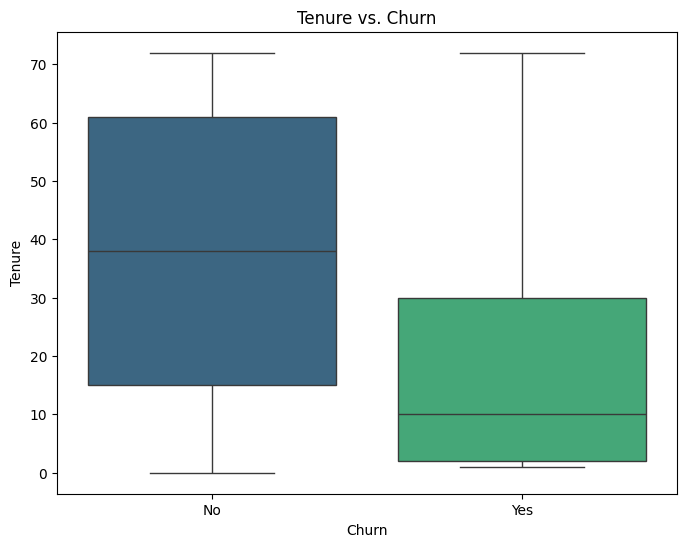

In [145]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure vs. Churn')
plt.show()

Customers with lower tenure have a higher churn rate, while those with higher tenure are less likely to churn. There is an inverse relationship between tenure and churn rate.

## 5. Demographic Information Vs. Churn

In [146]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop through each column name to create a subplot
    for column, ax in zip(columns_to_plot, axes.flatten()):
        # calculate the percentage of observations of the response variable for each group of the independent variable
        prop_by_independent = pd.crosstab(train_data[column], train_data['churn']).apply(lambda x: x / x.sum() * 100, axis=1)

        # plot the stacked bar chart using the 'viridis' colors
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=["#3E4989", "#35B779"])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column, fontsize=8, loc='left')
        ax.tick_params(rotation='auto')

        # remove the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

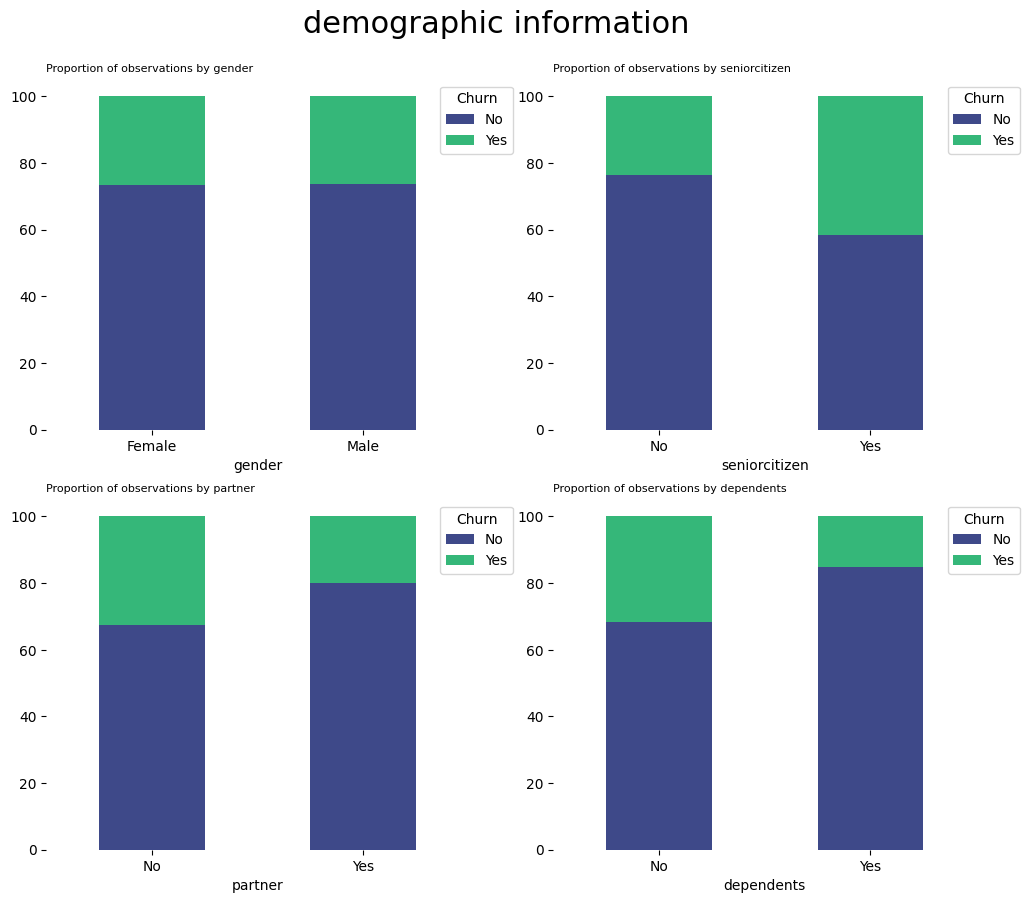

In [147]:
# demographic column names
demographic_columns = ['gender', 'seniorcitizen', 'partner', 'dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'demographic information')

The churn rate of senior citizens is almost double that of young citizens.
Customers with a partner churn less than customers with no partner.

## 6. Customer Account Information Vs. Churn

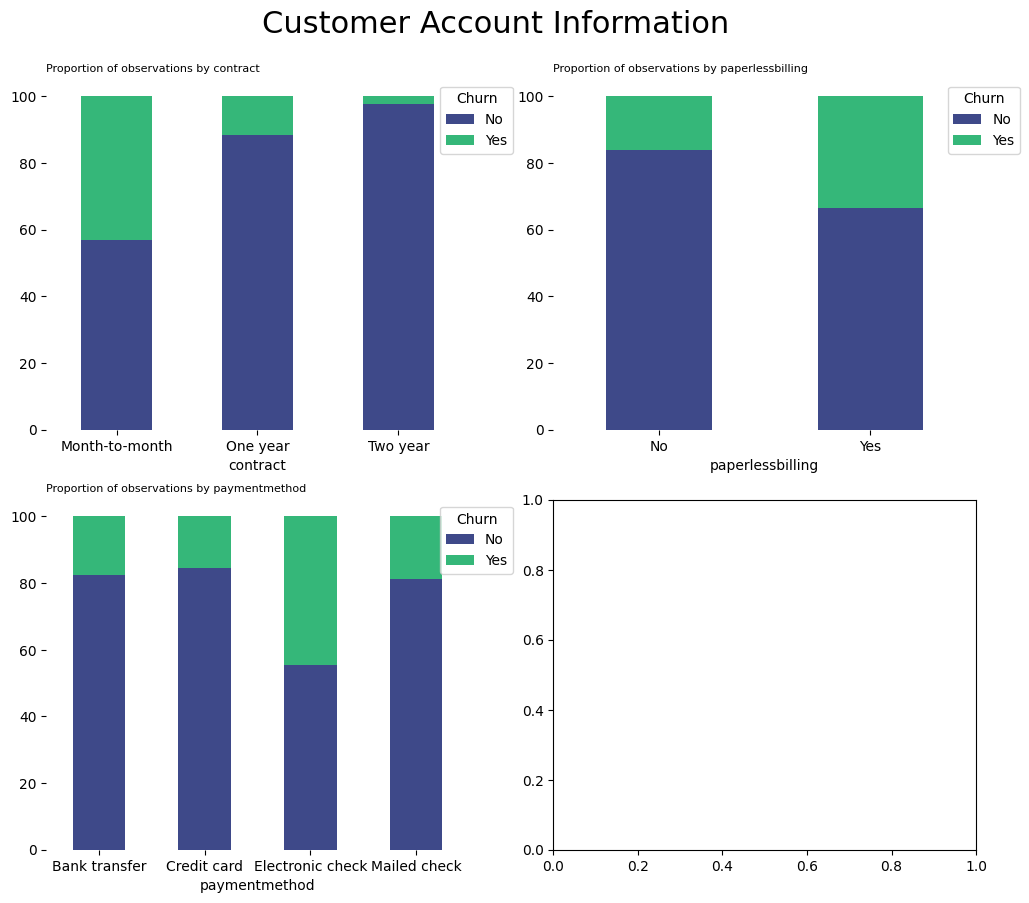

In [148]:
# Evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).
account_columns = ['contract', 'paperlessbilling', 'paymentmethod']

# Stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
Customers who opted for an electronic check as paying method are more likely to leave the company.
Customers subscribed to paperless billing churn more than those who are not subscribed.

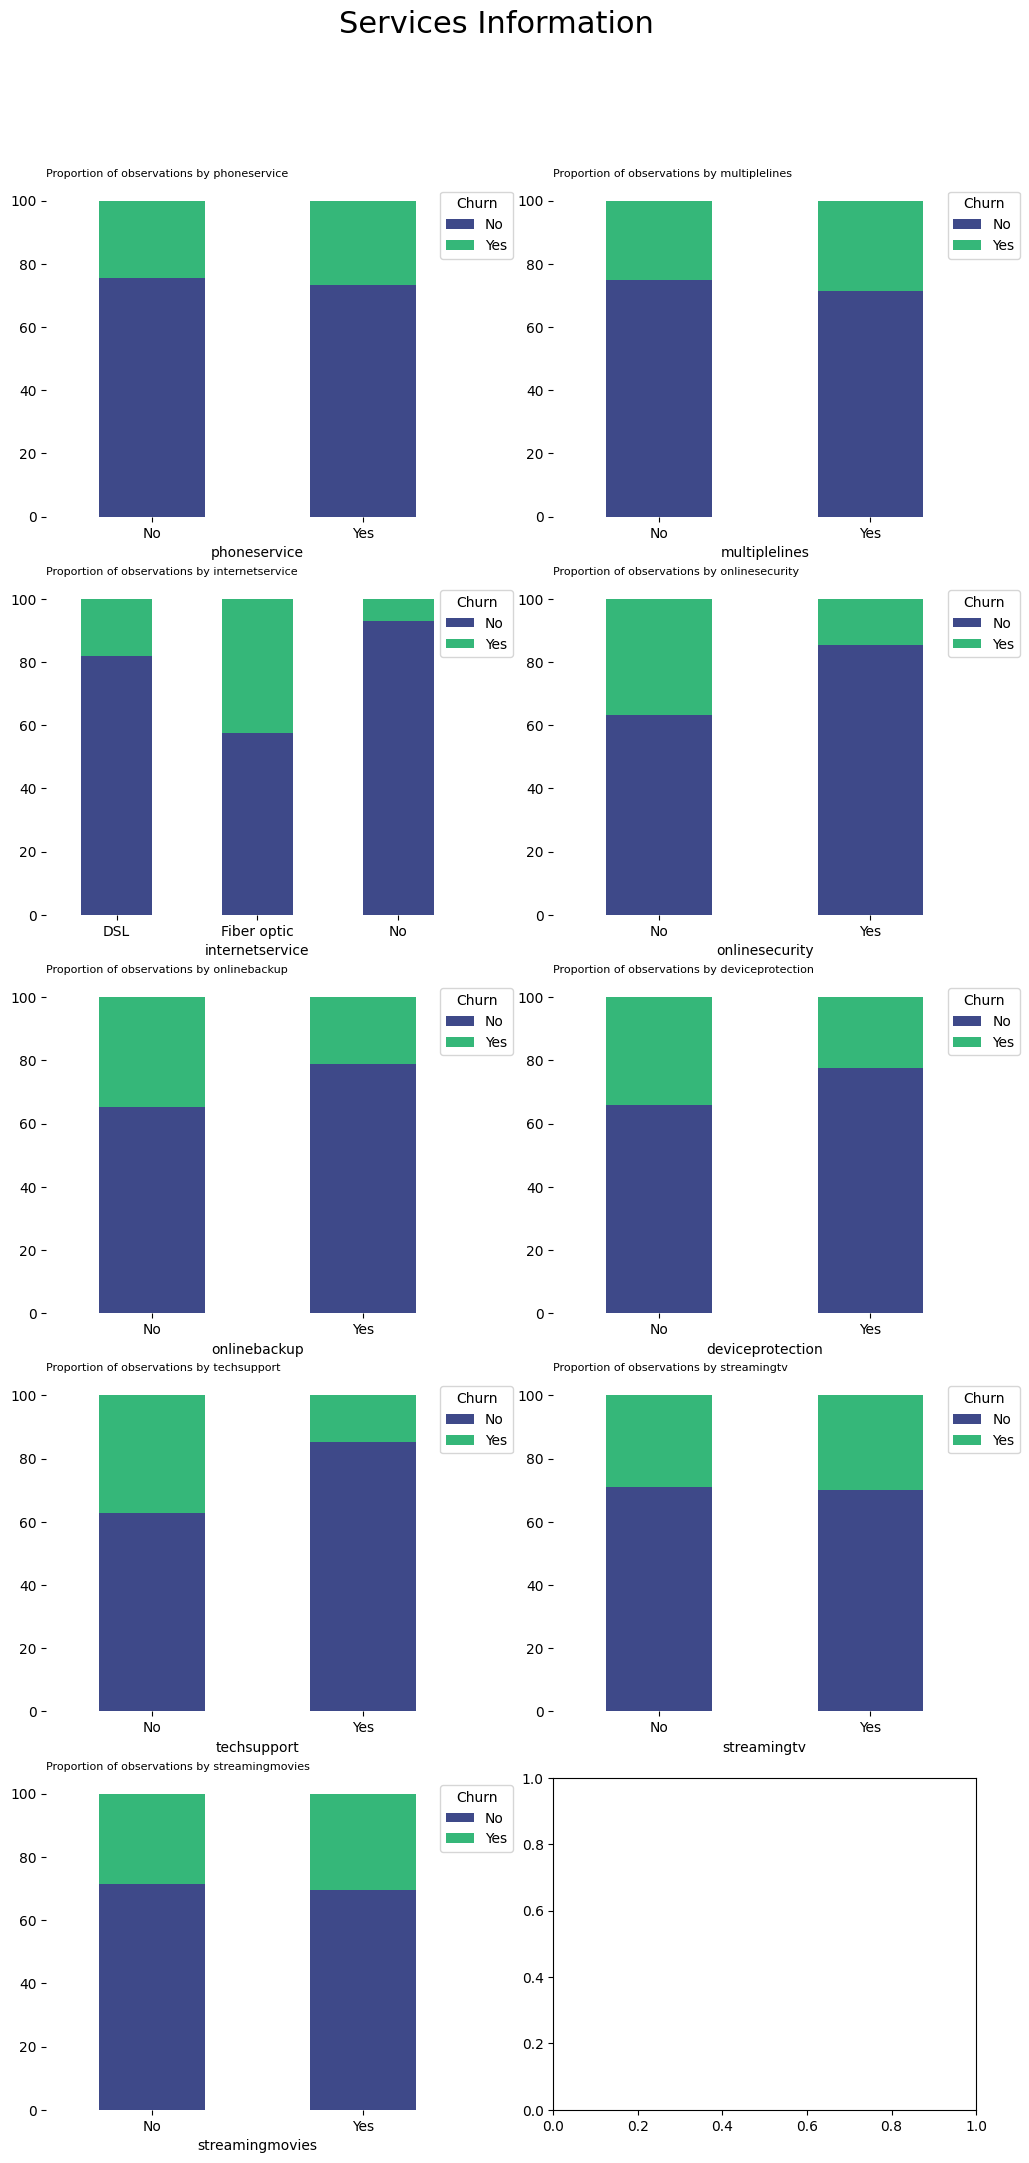

In [149]:
# Plot the percentage of the target for each category of the services columns with stacked bar plots.
# Services column names
services_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Stacked plot of services columns
percentage_stacked_plot(services_columns,'Services Information')

The phone attributes (PhoneService and MultipleLines) don't have significant predictive power since the percentage of churn for all classes in both independent variables is nearly the same.

Customers who do not have online security, online backup, device protection, tech support, and streaming TV/movies are more likely to churn compared to those who have these services.

## 7. Monthly Charges Vs. Tenure

<Axes: xlabel='tenure', ylabel='monthlycharges'>

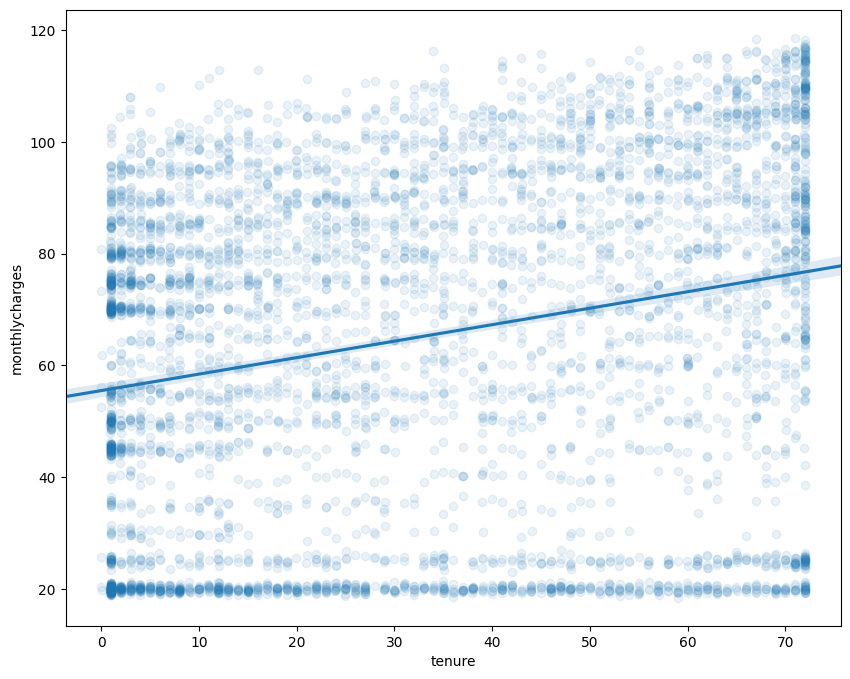

In [150]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "tenure", 
            y = "monthlycharges", 
            data = train_data,truncate=False, x_jitter=0.05, scatter_kws={'alpha':0.09})

Monthly charges increase as tenure increasesLoyal customers are with highest monthly charges, and as customer stays for longer period a more trust is built therefore higher charges.

# Multivariate Analysis

## 1. Tenure vs. Monthly charges vs. total charges

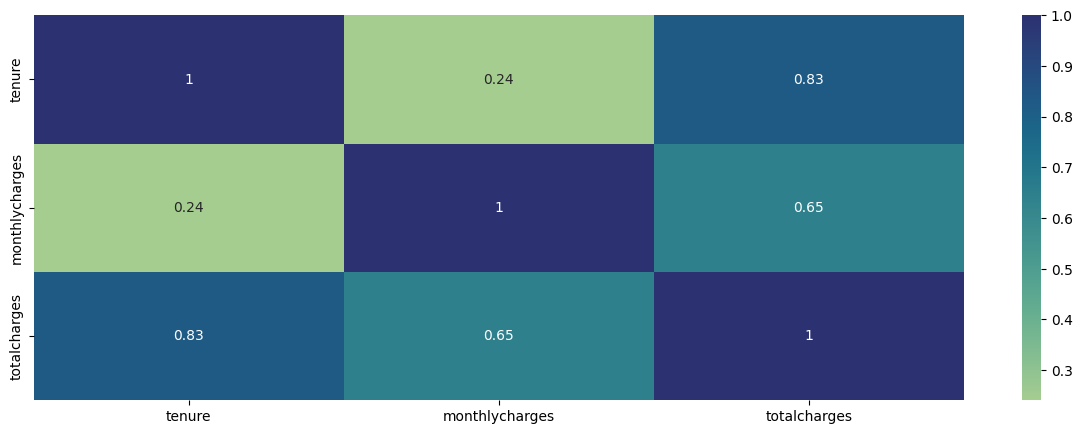

In [151]:
# plot a heatmap for all the numerical columns to show correlation
plt.figure( figsize=(15, 5))
sns.heatmap(data=train_data.select_dtypes('number').corr(), cmap='crest', annot=True)
plt.show()

### Based on the correlation matrix provided:

Tenure and MonthlyCharges have a positive correlation of approximately 0.24. This indicates that there is a weak positive relationship between longer tenure and higher monthly charges.

MonthlyCharges and TotalCharges have a positive correlation of approximately 0.65. This implies that there is a moderate positive relationship between higher monthly charges and higher total charges.

Tenure and TotalCharges have a strong positive correlation of approximately 0.83. This indicates that there is a strong positive relationship between longer tenure and higher total charges.

## 2. Relationship between Monthly Charges, Internet Service, and Churn

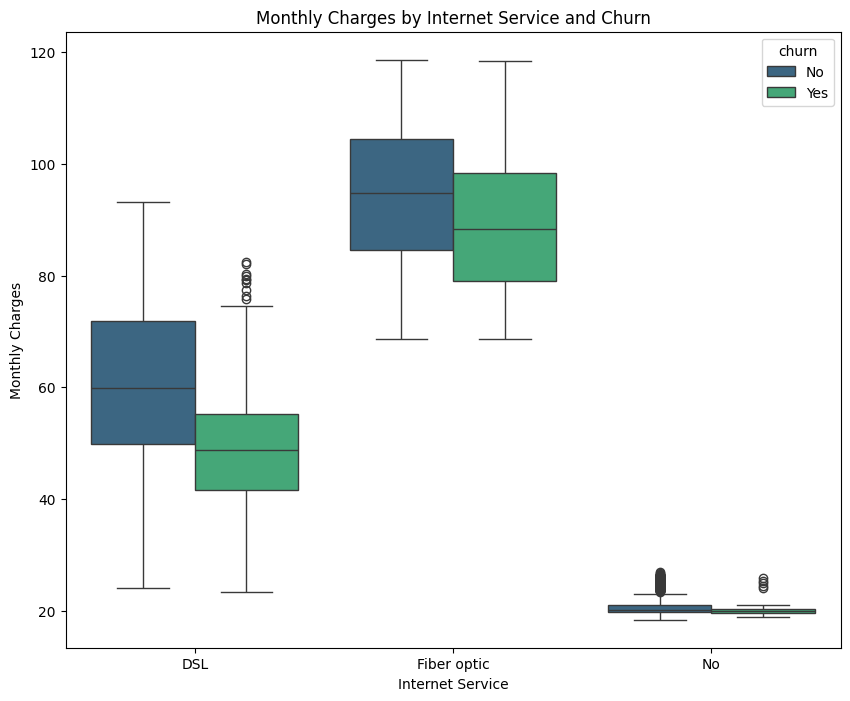

In [152]:
# Create box plots for numerical features by churn
plt.figure(figsize=(10, 8))
sns.boxplot(x='internetservice', y='monthlycharges', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()

From the plot, it can be observed that customers using fiber optic internet service generally have higher monthly charges compared to those using DSL. Additionally, the boxplot highlights that churned customers, irrespective of the internet service type, tend to have higher monthly charges compared to non-churned customers. This suggests that customers with higher monthly charges may be more likely to churn, and this relationship may be more pronounced for fiber optic users.

From the chart, we can observe that customers using fiber optic internet service without online security have the highest churn rate, indicating that the absence of online security may contribute to customer dissatisfaction and increased churn. On the other hand, customers using DSL internet service with online security have the lowest churn rate, suggesting that the presence of online security may help retain customers.

The scatter plot matrix analysis provides a comprehensive overview of the relationships between multiple numerical features (tenure, MonthlyCharges, and TotalCharges) and their association with churn. 

The analysis reveals the following:

Customers with shorter tenure and lower monthly charges are more likely to churn, indicating the need for strategies to engage and retain these customers. 

There is a positive correlation between tenure and total charges, indicating that as customers stay longer, their total charges tend to increase, and higher total charges are associated with lower churn rates. 

Similarly, higher monthly charges are linked to higher total charges and lower churn rates. These findings suggest that retaining customers with longer tenure, higher monthly charges, and higher total charges should be a priority.

# Hypothesis Testing and Answering Questions

## Hypothesis Testing

### Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

In [156]:
# Group the columns based on demographics, services, and payment methods
demographics_cols = ['gender', 'seniorcitizen', 'partner', 'dependents']
services_cols = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
payment_cols = ['contract', 'paperlessbilling', 'paymentmethod']

# Perform the hypothesis test for each group
groups = [demographics_cols, services_cols, payment_cols]
group_names = ['demographics', 'services', 'payment methods']

for group, group_name in zip(groups, group_names):
    # Create a contingency table between 'Churn' and each column within the group
    contingency_tables = []
    for column in group:
        contingency_table = pd.crosstab(train_data['churn'], train_data[column])
        contingency_tables.append(contingency_table)
    
    # Combine all the contingency tables into a single table
    combined_table = pd.concat(contingency_tables, axis=1)
    
    # Perform the chi-square test of independence
    chi2, p_value, _, _ = chi2_contingency(combined_table)
    
    # Set the significance level
    alpha = 0.05
    
    # Check the p-value against the significance level to make a decision
    if p_value < alpha:
        print(f"Reject the null hypothesis for {group_name}.")
        print(f"The churn rate of customers is influenced by various factors related to {group_name.lower()}.")
    else:
        print(f"Fail to reject the null hypothesis for {group_name}.")
        print(f"The churn rate of customers is not significantly influenced by various factors related to {group_name.lower()}.")


Reject the null hypothesis for demographics.
The churn rate of customers is influenced by various factors related to demographics.
Reject the null hypothesis for services.
The churn rate of customers is influenced by various factors related to services.
Reject the null hypothesis for payment methods.
The churn rate of customers is influenced by various factors related to payment methods.


The null hypothesis was rejected for all three groups: demographics, services, and payment methods. The chi-square test of independence was conducted for each group, and the p-values were compared to a significance level of 0.05. The p-values obtained for all groups were found to be less than the significance level, indicating a statistically significant association between the factors within each group and the churn rate of customers. Therefore, it can be concluded that the churn rate of customers is influenced by various factors related to demographics, services, and payment methods.

## Answering Questions

### 1. Is there a relationship between the monthly charges and the likelihood of churn?

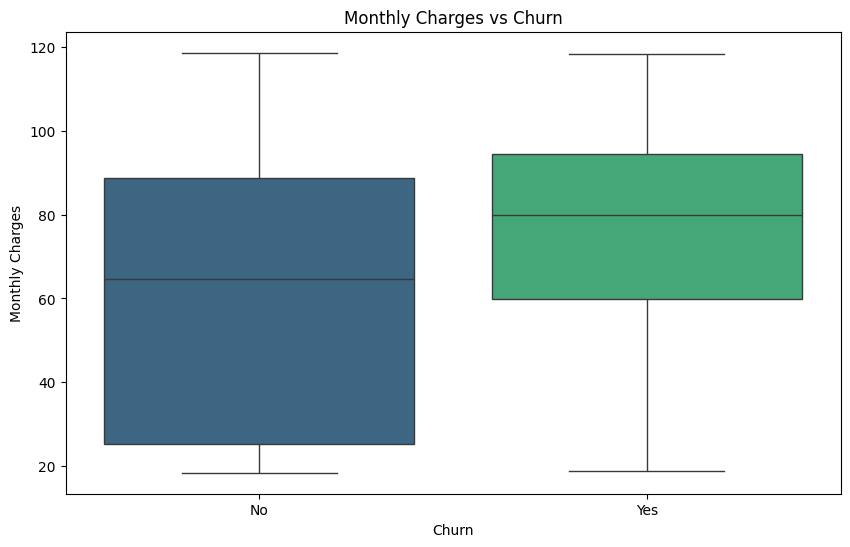

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthlycharges', data=train_data, palette='viridis')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The boxplot visualization allows us to compare the distribution of monthly charges between customers who churned and those who didn't. It shows that customers who churn tend to have slightly higher monthly charges compared to those who do not churn.

### 2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

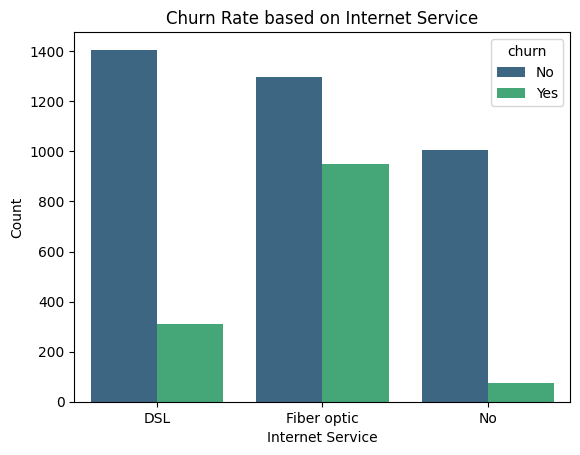

In [158]:
sns.countplot(x='internetservice', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Rate based on Internet Service')
plt.show()

Among customers with internet service, those with fiber optic tend to have a higher churn rate compared to those with DSL.

### 3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

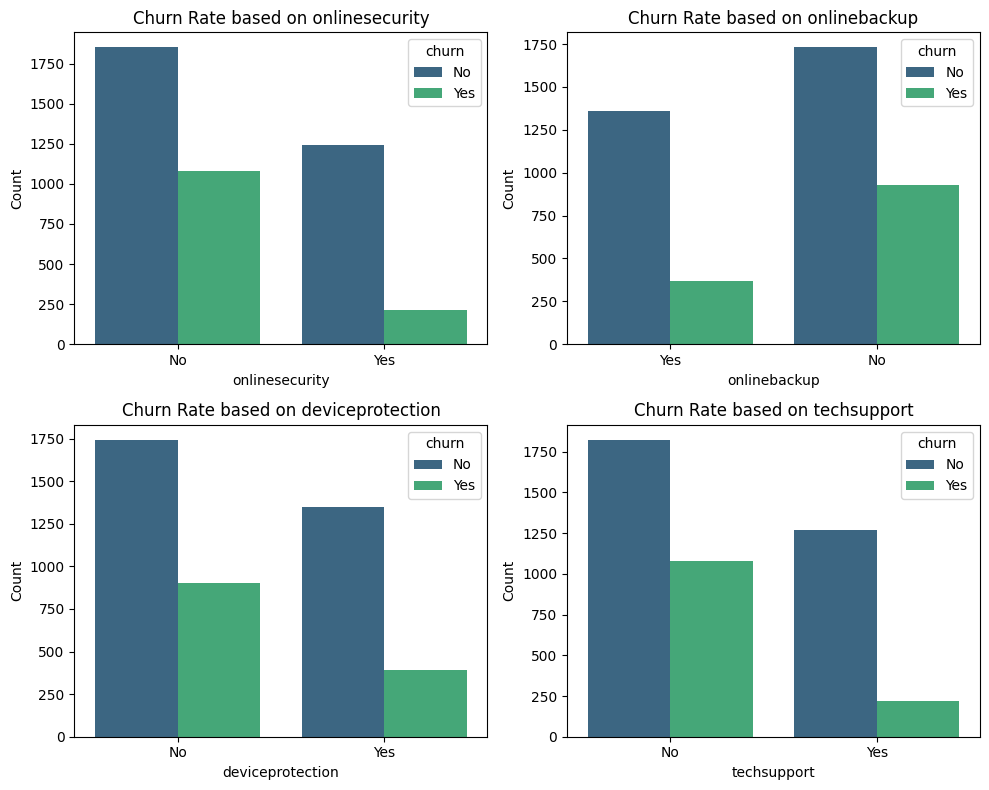

In [159]:
services = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, service in zip(axes.flatten(), services):
    sns.countplot(x=service, hue='churn', data=train_data, ax=ax, palette='viridis')
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Rate based on {service}')

plt.tight_layout()
plt.show()

Customers who do not have online security, online backup, device protection, or tech support tend to have higher churn rates compared to those who have these services.

### 4 How does the churn rate vary based on the customers' gender

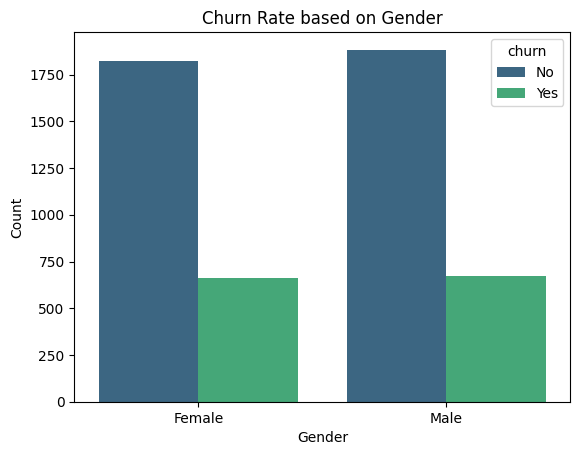

In [160]:
sns.countplot(x='gender', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate based on Gender')
plt.show()

There is no significant difference in churn rates between male and female customers.

### 5. Does the presence of a partner influence the likelihood of churn?


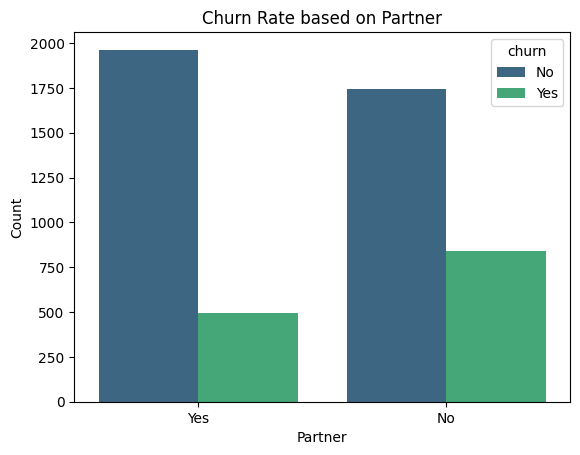

In [161]:
sns.countplot(x='partner', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Rate based on Partner')
plt.show()

Customers who do not have a partner tend to have a slightly higher churn rate compared to those who have a partner.

## data preparation for modelling

In [164]:
# check for nulls in y 
train_data['churn'].isnull().sum()

np.int64(1)

In [165]:
# Drop rows with null values in the 'churn' column
train_data.dropna(subset=['churn'], inplace=True)

In [167]:
# Split data into X and y
X = train_data.drop('churn', axis=1)
y = train_data['churn']

In [168]:
# checking for data balance
y.value_counts()

churn
No     3706
Yes    1336
Name: count, dtype: int64

In [169]:
# split the data into train and validation/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [180]:
# Check the size of the training and test sets with the shape() function:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_test.shape)

(((4033, 19), (4033,)), ((1009, 19), (1009,)), (1009, 19))

In [170]:
# encode y

# instantiate encoder
encoder = LabelEncoder()

# encode y_train
y_train_encoded = encoder.fit_transform(y_train)

# encode y_test
y_test_encoded = encoder.transform(y_test)

**Prepare Pipeline**

In [171]:
#Get categorical columns
categorical_columns = X.select_dtypes('object').columns

#Get numerical columns
numerical_columns = X.select_dtypes('number').columns

In [176]:
# prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', RobustScaler())
    
])

# prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())

])

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

### Modelling

In [181]:
# Instantiate models
models = [
    ('XGB', xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    )),
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=15)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('Random_Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42))
]

In [182]:
# All pipelines storage dictionary
all_pipelines = {}

# All pipelines storage dictionary
all_confusion_matrix =  {}


# Creating a metrics dataframe
metrics_table = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for model, classifier in models:

    # Creating final pipeline
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])
    # Fit data to final pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model] = final_pipeline

    # Predicting
    y_pred = final_pipeline.predict(X_test)

    # define condusion confusion_matrix
    confusion_matrix_imb = confusion_matrix(y_test_encoded, y_pred)

    all_confusion_matrix[model] = confusion_matrix_imb                            

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Get all the metrics of interest
    Accuracy = metrics['accuracy']
    Precision = metrics['weighted avg']['precision']
    Recall = metrics['weighted avg']['recall']
    F1_Score = metrics['weighted avg']['f1-score']

    metrics_table.loc[len(metrics_table)] = [model, Accuracy, Precision, Recall, F1_Score]

metrics_table.sort_values(by='F1_Score', ascending=False, ignore_index=True)

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,Logistic_Regression,0.796829,0.791724,0.796829,0.793807
1,Gradient_Boosting,0.796829,0.789830,0.796829,0.792347
2,XGB,0.796829,0.786969,0.796829,0.789477
3,KNN,0.783944,0.783944,0.783944,0.783944
4,Random_Forest,0.784936,0.773101,0.784936,0.776063
5,Decision_Tree,0.714569,0.730223,0.714569,0.721072


### findings
- **Logistic Regression** performs consistently across all metrics, making it a reliable model with balanced precision and recall. It has the highest F1-score, indicating a good balance between precision and recall.

-  **Gradient Boosting** shows similar accuracy to Logistic Regression but slightly lower precision and F1-score. It's a strong model with robust performance, especially in terms of recall

- **XGBoost** has the same accuracy and recall as Logistic Regression and Gradient Boosting but with slightly lower precision and F1-score. It is still a very effective model but with a slight trade-off in precision

- **Decision Tree** and **K-Nearest Neighbors** also perform well, but their F1-scores are lower than Logistic Regression and Gradient Boosting. They are not as strong models as the others.

### Confusion matrix

#### LogisticRegression confusion matrix

In [183]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [184]:
# a snippet of how our confusion_matrix looks like
all_confusion_matrix['Logistic_Regression']

array([[651,  91],
       [114, 153]])

# Feature Engineering

## Encoding categorical variables

### i. Train Data

In [ ]:
# Performing one-hot encoding on selected categorical columns in the train dataset using the pd.get_dummies() function
# The drop_first=True parameter is is used to drop the first category in each encoded column to avoid multicollinearity. 
train_df_encoded = pd.get_dummies(train_df[['gender', 'SeniorCitizen','Partner', 'Dependents', 'PhoneService',
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                            'PaperlessBilling', 'PaymentMethod']], drop_first=True)

train_df_encoded.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
# Create a new DataFrame 'int_df' containing numeric columns from the train dataset
train_int_df = train_df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# Display the 'int_df' DataFrame
train_int_df

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.850000,29.850000,0
1,34,56.950001,1889.500000,0
2,2,53.849998,108.150002,1
3,45,42.299999,1840.750000,0
4,2,70.699997,151.649994,1
...,...,...,...,...
5038,24,84.800000,1990.500000,0
5039,72,103.200000,7362.900000,0
5040,11,29.600000,346.450000,0
5041,4,74.400000,306.600000,1


In [ ]:
# Conduct horizontal concantenation using the axis=1 parameter to join the two dataframes into the final train dataset
train_df_final = pd.concat([train_df_encoded, train_int_df], axis=1)
train_df_final.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,29.850000,29.850000,0
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,1,34,56.950001,1889.500000,0
2,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,2,53.849998,108.150002,1
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,45,42.299999,1840.750000,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,2,70.699997,151.649994,1


In [ ]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5025 entries, 0 to 5042
Data columns (total 30 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           5025 non-null   uint8  
 1   SeniorCitizen_Yes                     5025 non-null   uint8  
 2   Partner_Yes                           5025 non-null   uint8  
 3   Dependents_Yes                        5025 non-null   uint8  
 4   PhoneService_Yes                      5025 non-null   uint8  
 5   MultipleLines_Yes                     5025 non-null   uint8  
 6   InternetService_Fiber optic           5025 non-null   uint8  
 7   InternetService_No                    5025 non-null   uint8  
 8   OnlineSecurity_No internet service    5025 non-null   uint8  
 9   OnlineSecurity_Yes                    5025 non-null   uint8  
 10  OnlineBackup_No internet service      5025 non-null   uint8  
 11  OnlineBackup_Yes 

### ii. Test Data

In [ ]:
# Performing one-hot encoding on selected categorical columns in the test dataset using the pd.get_dummies() function
# The drop_first=True parameter is is used to drop the first category in each encoded column to avoid multicollinearity. 
test_df_encoded = pd.get_dummies(test_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                                            'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                                            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                            'PaperlessBilling', 'PaymentMethod']], drop_first=True)

test_df_encoded.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,1,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,1,0,0,0,1,0
3,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
# Create a new DataFrame 'int_df' containing numeric columns from the train dataset
test_int_df = test_df[['tenure', 'MonthlyCharges', 'TotalCharges']]

# Display the 'int_df' DataFrame
test_int_df

,tenure,MonthlyCharges,TotalCharges
0,12,84.45,1059.55
1,9,20.40,181.80
2,27,81.70,2212.55
3,27,79.50,2180.55
4,1,89.15,89.15
...,...,...,...
1995,7,75.10,552.95
1996,47,74.05,3496.30
1997,2,44.70,93.70
1998,62,110.75,7053.35


In [ ]:
# Conduct horizontal concantenation using the axis=1 parameter to join the two dataframes into the final train dataset
test_df_final = pd.concat([test_df_encoded, test_int_df], axis=1)
test_df_final.head()

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,1,0,1,0,12,84.45,1059.55
1,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,1,9,20.40,181.80
2,1,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,1,0,27,81.70,2212.55
3,1,0,0,1,1,1,1,0,0,0,...,0,0,0,1,0,1,0,27,79.50,2180.55
4,1,0,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,89.15,89.15


In [ ]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender_Male                           1994 non-null   uint8  
 1   SeniorCitizen_Yes                     1994 non-null   uint8  
 2   Partner_Yes                           1994 non-null   uint8  
 3   Dependents_Yes                        1994 non-null   uint8  
 4   PhoneService_Yes                      1994 non-null   uint8  
 5   MultipleLines_Yes                     1994 non-null   uint8  
 6   InternetService_Fiber optic           1994 non-null   uint8  
 7   InternetService_No                    1994 non-null   uint8  
 8   OnlineSecurity_No internet service    1994 non-null   uint8  
 9   OnlineSecurity_Yes                    1994 non-null   uint8  
 10  OnlineBackup_No internet service      1994 non-null   uint8  
 11  OnlineBackup_Yes 

The final dafaframes are properly encoded and ready for modelling

# Modelling

## Splitting The Train and Test into the X and y variables

In [ ]:
# Split the train DataFrame into features (X_train) and target variable (y_train)
X = train_df_final.drop('Churn', axis=1)
y = train_df_final['Churn']

X_test = test_df_final

# Split the X and y into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# Check the size of the training and evaluation sets with the shape() function:
(X_train.shape, y_train.shape), (X_eval.shape, y_eval.shape), (X_test.shape)

(((4020, 29), (4020,)), ((1005, 29), (1005,)), (1994, 29))

## Feature Scaling

In [ ]:
# Create an instance of the MinMaxScaler and set the feature range to (0, 1)
mms = MinMaxScaler(feature_range=(0, 1))

# Select the columns to be scaled
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply feature scaling to the training features (X_train)
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = mms.fit_transform(X_train[columns_to_scale])

# Apply feature scaling to the evaluation features (X_eval)
X_eval_scaled = X_eval.copy()
X_eval_scaled[columns_to_scale] = mms.transform(X_eval[columns_to_scale])

# Convert the scaled training features back into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled)

# Convert the scaled evaluation features back into a DataFrame
X_eval_scaled = pd.DataFrame(X_eval_scaled)

#### Balancing The Dataset Using SMOTE

In [ ]:
# Create an instance of the SMOTE algorithm
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

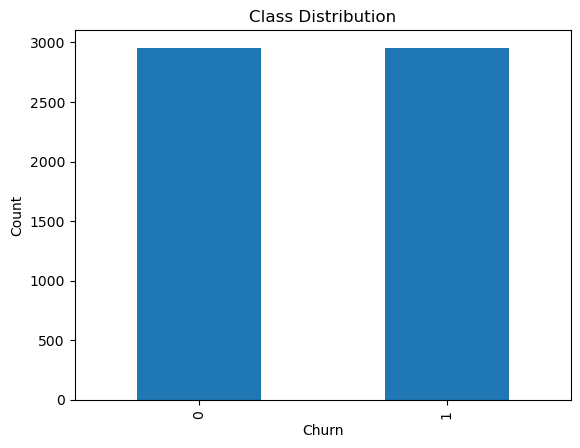

In [ ]:
# Count the occurrences of each class in the balanced dataset
class_counts = y_train_balanced.value_counts()

# Plot the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

The data is now balanced.

## Model Training and Evaluation

In [ ]:
# Initialize an empty dictionary named 'Results' to store the evaluation results for different models.
Results = {'Model':[], 'Acurracy':[], 'Precision':[], 'Recall':[], 'F1':[]}

In [ ]:
# Converting the dictionary Results into a pandas DataFrame.
Results = pd.DataFrame(Results)
Results.head()

,Model,Acurracy,Precision,Recall,F1


In [ ]:
# Machine Learning Models Initialization
# Logistic Regression
lr = LogisticRegression()

# Random Forest
rf = RandomForestClassifier()

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Decision Tree Classifier
dt = DecisionTreeClassifier()

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Gaussian Naive Bayes
nb = GaussianNB()

# Support Vector Machine
svm = SVC()

In [ ]:
# Set a random seed
np.random.seed(42)
random.seed(42)

# Initialize the Results DataFrame
Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

# List of model names
models = ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors', 'Decision Tree', 
          'Gradient Boosting Classifier', 'Gaussian Naive Bayes', 'Support Vector Machine']

# Fit the models and evaluate the performance
for model_name, model in zip(models, [lr, rf, knn, dt, gb, nb, svm]):
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_eval_scaled)

    print('Model:', model_name)
    print('===' * 18)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_eval, y_pred))
    print('Classification Report:'), 
    print(classification_report(y_eval, y_pred))
    print('Accuracy:', round(accuracy_score(y_eval, y_pred), 2))
    print('Precision:', round(precision_score(y_eval, y_pred), 2))
    print('Recall:', round(recall_score(y_eval, y_pred), 2))
    print('F1:', round(f1_score(y_eval, y_pred), 2))
    print()
    
    
    # Create a dictionary with the model name and the evaluation results    
    R = {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_eval, y_pred), 2),
        'Precision': round(precision_score(y_eval, y_pred), 2),
        'Recall': round(recall_score(y_eval, y_pred), 2),
        'F1': round(f1_score(y_eval, y_pred), 2)
    }
    
    # Append the results to the DataFrame
    Results = Results.append(R, ignore_index=True)

# Print the results
Results

Model: Logistic Regression
Confusion Matrix:
[[546 193]
 [ 54 212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82       739
           1       0.52      0.80      0.63       266

    accuracy                           0.75      1005
   macro avg       0.72      0.77      0.72      1005
weighted avg       0.81      0.75      0.77      1005

Accuracy: 0.75
Precision: 0.52
Recall: 0.8
F1: 0.63

Model: Random Forest
Confusion Matrix:
[[609 130]
 [ 80 186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       739
           1       0.59      0.70      0.64       266

    accuracy                           0.79      1005
   macro avg       0.74      0.76      0.75      1005
weighted avg       0.81      0.79      0.80      1005

Accuracy: 0.79
Precision: 0.59
Recall: 0.7
F1: 0.64

Model: K-Nearest Neighbors
Confusion Matrix:
[[510 229]
 [ 58 20

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.75,0.52,0.80,0.63
1,Random Forest,0.79,0.59,0.70,0.64
2,K-Nearest Neighbors,0.71,0.48,0.78,0.59
3,Decision Tree,0.72,0.48,0.61,0.53
4,Gradient Boosting Classifier,0.76,0.53,0.81,0.64
5,Gaussian Naive Bayes,0.67,0.44,0.86,0.58
6,Support Vector Machine,0.75,0.51,0.76,0.61


The results provided are performance metrics for different machine learning models evaluated for predicting customer churn. Here's what each metric represents:

i. Accuracy: It measures the overall correctness of the predictions made by the model. It is calculated as the ratio of correctly predicted instances to the total number of instances. A higher accuracy indicates a better-performing model.

ii. Precision: It measures the proportion of correctly predicted positive instances (churned customers) out of all instances predicted as positive by the model. It helps evaluate the model's ability to avoid false positives.

iii.Recall: Also known as sensitivity or true positive rate, it measures the proportion of correctly predicted positive instances out of all actual positive instances. It helps evaluate the model's ability to capture the positive instances (churned customers) correctly.

iv. F1 Score: It is the harmonic mean of precision and recall and provides a balanced measure of the model's performance. It considers both precision and recall, making it useful when there is an imbalance between positive and negative instances.

The focus is on the F1 score because it provides a balanced evaluation of a model's performance, considering both precision and recall. 

Logistic Regression: It achieves an accuracy of 75%, meaning 75% of the predictions are correct. The precision of 52% indicates that out of all the customers predicted as churned, 52% are actually churned. The recall of 80% means that 80% of the churned customers are correctly identified. The F1 score of 0.63 balances the trade-off between precision and recall.

Random Forest: This model performs better with an accuracy of 79%. It has a precision of 59%, indicating improved identification of churned customers compared to logistic regression. The recall of 71% shows that it captures a good proportion of churned customers. The F1 score of 0.65 indicates a balanced performance.

K-Nearest Neighbors: This model achieves an accuracy of 71%. The precision of 48% suggests a lower ability to identify true positives. The recall of 78% indicates a higher proportion of captured churned customers. The F1 score of 0.59 shows a balance between precision and recall, but it is relatively lower compared to other models.

Decision Tree: It achieves an accuracy of 71%. The precision of 46% and recall of 61% indicate a moderate ability to identify churned customers. The F1 score of 0.52 suggests a trade-off between precision and recall.

Gradient Boosting: This model has an accuracy of 76%, slightly better than logistic regression. The precision of 53% and recall of 81% indicate a better ability to identify churned customers. The F1 score of 0.64 shows a balanced performance.

Gaussian Naive Bayes: This model achieves an accuracy of 67%. The precision of 44% and recall of 86% indicate a better ability to identify churned customers. The F1 score of 0.58 shows a balanced performance.

Support Vector Machine: This model achieves an accuracy of 75%. The precision of 51% indicates a lower ability to identify true positives. However, the recall of 76% suggests a higher proportion of captured churned customers. The F1 score of 0.61 shows a trade-off between precision and recall.

In [ ]:
# Convert columns to float type
Results['F1'] = Results['F1'].astype(float)

# Find the index of the maximum value in each score 
max_f1 = Results['F1'].idxmax()

# Print the model with the best accuracy, precision, recall and f1 score
print("Best F1 Model:", Results.loc[max_f1]['Model'])

Best F1 Model: Random Forest


The Random Forest model has the best F1-score among the models. Therefore, the Random Forest model appears to be the best choice for predicting churn in this scenario. The focus is on the F1 score because it provides a balanced evaluation of a model's performance, considering both precision and recall. 

## Model Improvement

 ### Using k-fold cross-validation to Evaluate the Random Forest model.

In [ ]:
# Define the number of folds for cross-validation
k = 5

# Create a k-fold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform cross-validation and calculate the scores
scores = cross_val_score(rf, X_train_balanced, y_train_balanced, cv=kf, scoring='f1')

# Round the scores to two decimal places
rounded_scores = [round(score, 2) for score in scores]

print("Cross-Validation Scores:")
print(rounded_scores)

Cross-Validation Scores:
[0.84, 0.84, 0.86, 0.85, 0.85]


In [ ]:
# Calculate the mean and standard deviation of the F1 scores
mean_f1_score = round(scores.mean(), 2)
std_f1_score = round(scores.std(), 2)

# Print the mean and standard deviation
print("Mean F1 Score:", mean_f1_score)
print("Standard Deviation of F1 Scores:", std_f1_score)

Mean F1 Score: 0.85
Standard Deviation of F1 Scores: 0.01


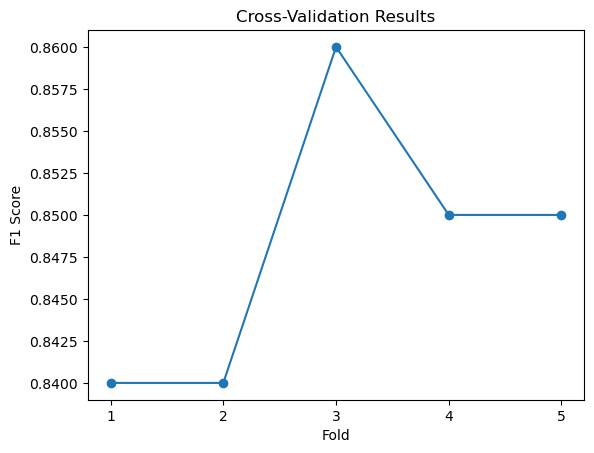

In [ ]:
# F1 scores obtained from cross-validation
f1_scores = (rounded_scores)

# Plot the F1 scores
plt.plot(range(1, len(f1_scores) + 1), f1_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.title('Cross-Validation Results')
plt.xticks(range(1, len(f1_scores) + 1))
plt.show()

The random forest model achieved F1 scores of [0.84, 0.84, 0.86, 0.85, 0.85] across the five folds. The mean F1 score was 0.85, indicating reasonable accuracy in predicting churn. The standard deviation of 0.01 suggests consistent performance in churn prediction across the folds.

k-Fold cross-validation was used for the random forest model to evaluate its performance and assess its ability to predict churn. It allowed me to do a comprehensive evaluation of its performance, analyzing consistency, and optimizing hyperparameters. It provided a robust assessment of the model's ability to predict churn and helped in making informed decisions regarding model selection and improvement.

### Hyperparameter tuning 

Hyperparameter tuning is a crucial step in machine learning model development. It involves selecting the optimal values for the hyperparameters, which are configuration settings set by the user before training the model. The performance of a model depends on these hyperparameters, and finding the best combination is the goal of hyperparameter tuning. This is achieved by defining the search space for each hyperparameter, selecting an evaluation metric, and choosing a search strategy.

To begin the process, the hyperparameter search space is defined, specifying the range or possible values for each hyperparameter. An evaluation metric is chosen to reflect the model's performance goal, such as accuracy or F1 score. Next, a search strategy is selected to explore the hyperparameter space, which can be grid search, random search, or Bayesian optimization. The data is then split into training and validation sets, with the training set used to train the models and the validation set used to evaluate their performance.

Models are trained and evaluated for different hyperparameter combinations, and the chosen evaluation metric is used to assess their performance. The best hyperparameters are selected by comparing the performance of the models based on the validation scores obtained during the search. It is important to note that the model's performance should be evaluated on an independent test set to ensure its generalization to unseen data.

Hyperparameter tuning helps in finding the best configuration for a machine learning model, leading to improved performance and generalization. Techniques such as cross-validation and independent testing are employed to ensure the selected hyperparameters are not overfitting to the specific dataset. By repeatedly experimenting with different hyperparameter combinations and evaluating the model's performance, the best hyperparameters can be determined, increasing the model's effectiveness in solving the given problem.

In [ ]:
# Tuning the Random Forest Model
# Define the parameter grid for tuning
param_grid = {
    # Select the number of decision trees
    'n_estimators': [100, 200, 300, 400, 500],
    
    # Maximum depth of each tree
    'max_depth': [5, 10, 15, None],  
    
    # Minimum number of samples required to split an internal node
    'min_samples_split': [2, 4, 6],  
    
    # Minimum number of samples required to be at a leaf node
    'min_samples_leaf': [1, 2, 3],  
    
    # Number of features to consider when looking for the best split
    'max_features': ['sqrt', 'log2', 0.5]
}
                     
# Perform randomized search cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=5, scoring='f1', n_iter=10)
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print('Best Hyperparameters:', best_params)
print('Best F1 Score:', best_score)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}
Best F1 Score: 0.8409900504367973


The best hyperparameters after performing randomized search cross-validation are {'max_depth': 15, 'max_features': log2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}, and the corresponding best F1 score is 0.841.

By tuning the Random Forest model with these optimized hyperparameters, there is a significant improvement in the F1 score compared to the initial score of 0.64. The model now achieves an F1 score of 0.841, indicating improved accuracy in predicting churn.

The 'max_depth' parameter controls the maximum depth of each tree. By setting it to 15, the trees can capture more complex patterns in the data, potentially leading to better predictive performance.

The 'max_features' parameter determines the number of features to consider when looking for the best split. Using 'log2' as the value means that the model will randomly select features based on the logarithm of the total number of features. This helps introduce diversity among the trees and can prevent overfitting.

The 'min_samples_leaf' parameter sets the minimum number of samples required to be at a leaf node. With a value of 1, the model allows for nodes with only one sample, enabling the trees to capture more specific patterns in the data.

The 'min_samples_split' parameter determines the minimum number of samples required to split an internal node. Setting it to 4 ensures that a node must have at least four samples to be considered for splitting, which can prevent overfitting by avoiding splits based on small subsets of the data.

The 'n_estimators' parameter specifies the number of decision trees in the Random Forest model. With 300 trees, the model forms a larger ensemble, which can enhance its predictive power and improve generalization.

By incorporating these optimized hyperparameters into the Random Forest model, I expect improved performance in predicting churn.

#### Perfomance after Hyperparameter Tuning

In [ ]:
# Create a new instance of the Random Forest model with tuned hyperparameters
rf_tuned = RandomForestClassifier(max_depth=15, max_features='log2', min_samples_leaf=1, min_samples_split=4, n_estimators=300)


# Fit the tuned Random Forest model and evaluate its performance
rf_tuned.fit(X_train_balanced, y_train_balanced)
y_pred_rf_tuned = rf_tuned.predict(X_eval_scaled)

print('Random Forest Model (Tuned Hyperparameters)')
print('===' * 18)

print('Confusion Matrix:')
print(confusion_matrix(y_eval, y_pred_rf_tuned))
print('Classification Report:')
print(classification_report(y_eval, y_pred_rf_tuned))
print('Accuracy:', round(accuracy_score(y_eval, y_pred_rf_tuned), 2))
print('Precision:', round(precision_score(y_eval, y_pred_rf_tuned), 2))
print('Recall:', round(recall_score(y_eval, y_pred_rf_tuned), 2))
print('F1:', round(f1_score(y_eval, y_pred_rf_tuned), 2))

Random Forest Model (Tuned Hyperparameters)
Confusion Matrix:
[[600 139]
 [ 74 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       739
           1       0.58      0.72      0.64       266

    accuracy                           0.79      1005
   macro avg       0.74      0.77      0.75      1005
weighted avg       0.81      0.79      0.79      1005

Accuracy: 0.79
Precision: 0.58
Recall: 0.72
F1: 0.64


#### Perfomance Comparison Before and After Hyperparameter Tuning

In the comparison between the Random Forest model before tuning and after tuning, the F1-scores are as follows:

Before Tuning: F1-Score = 0.64

After Tuning: F1-Score = 0.64

The F1 score remains the same after tuning the Random Forest model. This indicates that the tuning process did not have a significant impact on the model's performance in terms of the balance between precision and recall. 

## Saving the model

In [ ]:
# Define the key components
key_components = {
    'model': rf_tuned, 
    'best_params': {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators':
                    300},
    'best_score': 0.84
}

# Save the key components in a file using pickle
with open('rf_key_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)

## Predict on Unknown Dataset (Test_df)

In [ ]:
# Select the relevant columns for feature scaling
test_columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply feature scaling to the test features (test_df)
X_test_scaled = test_df_final.copy()
X_test_scaled[test_columns_to_scale] = mms.transform(test_df_final[test_columns_to_scale])

# Predict churn on the test dataset using the lr_tuned model
test_df_final['Churn_Predicted'] = rf_tuned.predict(X_test_scaled)

# Print the predicted churn values
test_df_final.head(10)

,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn_Predicted
0,1,0,0,0,1,1,1,0,0,0,...,0,0,1,0,1,0,12,84.45,1059.55,1
1,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,1,9,20.40,181.80,0
2,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,27,81.70,2212.55,0
3,1,0,0,1,1,1,1,0,0,0,...,0,0,1,0,1,0,27,79.50,2180.55,1
4,1,0,1,1,1,0,1,0,0,0,...,0,0,0,0,0,1,1,89.15,89.15,1
5,0,1,0,0,1,0,0,1,1,0,...,0,0,1,0,0,1,24,20.30,459.95,0
6,1,1,0,0,1,1,1,0,0,0,...,0,0,1,0,1,0,14,74.95,1036.75,1
7,0,1,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,32,74.40,2276.95,1
8,0,0,0,0,1,0,0,1,1,0,...,1,0,0,0,0,1,11,20.00,211.95,0
9,1,0,0,0,1,1,0,1,1,0,...,0,0,1,0,0,1,1,25.00,25.00,0


The displayed predictions show the model's churn predictions for the first 10 instances in the test dataset. These predictions are based on the trained model's analysis of customer features and are intended to help identify customers who are more likely to churn based on the unseen test dataset (test_df_final)

In [ ]:
# Get the true churn values from the evaluation set
true_churn = y_eval

# Get the predicted churn values from the dataset
predicted_churn = test_df_final['Churn_Predicted'].iloc[:len(y_eval)]

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(true_churn, predicted_churn)
confusion_matrix

array([[485, 254],
       [171,  95]], dtype=int64)

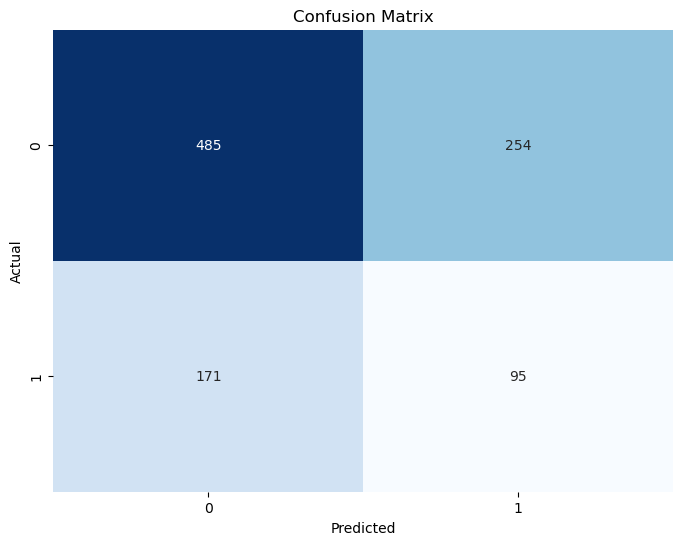

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix provides a visual representation of the model's predictions and their actual values. It shows the number of instances that fall into each category based on the model's predictions.

True Negative (TN): 485 - This indicates the number of instances that are correctly predicted as non-churn (0) by the model.

False Positive (FP): 254 - This indicates the number of instances that are incorrectly predicted as churn (1) by the model when they are actually non-churn.

False Negative (FN): 171 - This indicates the number of instances that are incorrectly predicted as non-churn (0) by the model when they are actually churn.

True Positive (TP): 95 - This indicates the number of instances that are correctly predicted as churn (1) by the model.

These values provide insights into the model's performance in predicting churn. For example, there are 485 true negatives, which means the model accurately predicted 485 instances as non-churn. On the other hand, there are 254 false positives, indicating instances that were predicted as churn but are actually non-churn. Similarly, there are 171 false negatives, indicating instances that were predicted as non-churn but are/were actually churn. Lastly, there are 95 true positives, meaning the model correctly predicted 95 instances as churn.

# Key Insights and Conclusion

## Key insights

### i. Monthly Charges vs. Churn:

Churned customers tend to have higher monthly charges compared to non-churned customers. This suggests that customers who are paying higher monthly charges may be more likely to churn.

The telco company should investigate the reasons behind the higher charges for churned customers and consider adjusting their pricing strategy to offer competitive rates and value-added services to retain customers.

### ii. Churn Distribution by Internet Service Type

Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

The telco company should focus on improving the quality and reliability of their fiber optic internet service to reduce churn. They could also consider offering incentives or discounts to encourage customers to switch from DSL to fiber optic service.

### iii. Churn Distribution by Partner

Customers with a partner churn less than customers with no partner.

The telco company could target marketing and retention strategies towards customers with no partner, such as offering family plans or promotions that encourage adding additional lines for family members. This can help improve customer retention rates.

### iv. Churn Distribution by Tenure

Customers with lower tenure have a higher churn rate, while those with higher tenure are less likely to churn. There is an inverse relationship between tenure and churn rate.

The telco company should focus on providing a positive customer experience during the initial stages of the customer's tenure to increase the likelihood of customer retention. They can implement onboarding programs, personalized offers, and excellent customer support to build loyalty and reduce early churn.

### v. Demographic Information vs. Churn

The dataset contains a higher proportion of male customers compared to female customers. However, gender does not have a significant impact on churn rate.

The telco company should consider expanding their marketing efforts to target female customers and ensure their services and promotions are inclusive and appealing to all genders. However, other demographic factors may have a more significant influence on churn, so it's essential to consider them in customer retention strategies.

### vi. Online Security, Backup, Device Protection, and Tech Support

Customers who do not have online security, online backup, device protection, and tech support services are more likely to churn compared to those who have these services.

The telco company should emphasize the importance of these services to customers and promote their benefits, such as data protection, technical assistance, and peace of mind. Offering bundled packages or discounts on these services can also help improve customer retention.

### vii.Monthly Charges vs. Tenure

Monthly charges increase as tenure increases. Loyal customers have the highest monthly charges, and as customers stay for a longer period, more trust is built, leading to higher charges.

The telco company can leverage this insight by offering loyalty rewards, personalized offers, and long-term contract discounts to encourage customers to stay for extended periods and increase their monthly charges over time.

### viii. Predicting Churn on Unknown Dataset (Test_df)

The trained model can be used to predict churn on an unknown dataset (Test_df) by applying feature scaling to the test features and using the trained model to predict churn values.

This capability can help the telco company identify customers in the test dataset who are more likely to churn and focus their retention efforts on those customers to reduce churn.

## Conclusion and Recommendations

Based on the analysis of the telco company's customer churn data, several key insights and recommendations can be drawn to improve customer retention:

i. Pricing Strategy
Review and adjust monthly charges to ensure competitiveness in the market and offer value-added services to customers, particularly those with higher monthly charges.

ii. Fiber Optic Internet Service
Improve the quality and reliability of fiber optic internet service to reduce churn among customers using this service.

iii. Partner Status
Develop targeted marketing and retention strategies for customers without a partner, such as family plans or promotions that encourage adding additional lines.

iv. Tenure
Focus on providing an excellent customer experience during the early stages of customer tenure to increase loyalty and reduce early churn.

v. Demographic Considerations
Expand marketing efforts to target underrepresented customer segments, such as female customers, ensuring inclusivity and relevance in services and promotions.

vi. Value-added Services
Emphasize the benefits of online security, backup, device protection, and tech support services to customers and consider offering bundled packages or discounts.

vii. Loyalty Rewards
Offer loyalty rewards, personalized offers, and long-term contract discounts to encourage customers to stay for extended periods and increase their monthly charges over time.

By implementing these recommendations, the telco company can improve customer satisfaction, reduce churn rates, and increase customer loyalty, ultimately leading to business growth and success.